#### Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
energy_data = pd.read_csv("energySoftware.csv")

## 1. CPU Distribution Analysis
We first examine the distribution of CPU usage across different implementations using box plots. This visualization helps us understand:
- The median CPU usage for each implementation
- The spread and variability of CPU usage
- Presence of any outliers

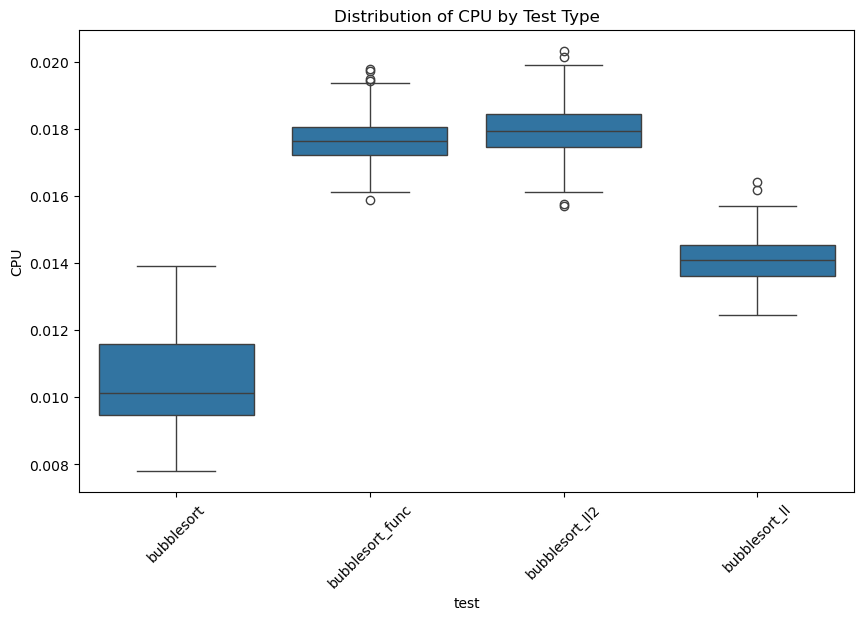

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='test', y='CPU', data=energy_data)
plt.title('Distribution of CPU by Test Type')
plt.xticks(rotation=45)
plt.show()

## 2. Comparing bubblesort vs bubblesort_ll
We compare the CPU usage between the standard bubble sort and linked list implementation:
- First checking for normality using histograms
- Applying appropriate statistical tests
- Calculating effect size for practical significance

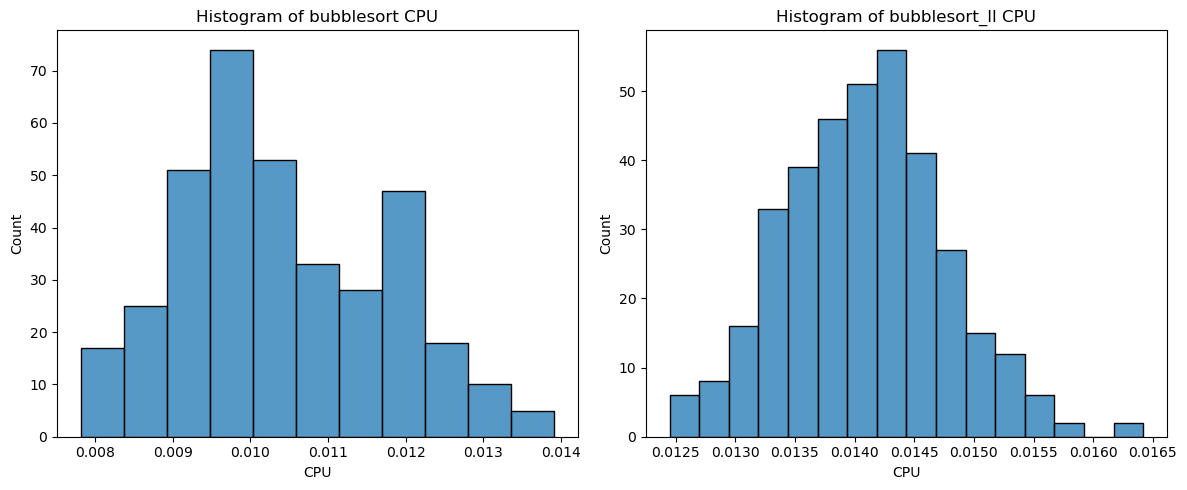

Mann-Whitney U test statistic: 645.5
p-value: 3.79156286604797e-117

Student's t-test results:
t-statistic: -47.4605


In [3]:
# Extract the two groups
bubblesort_cpu = energy_data[energy_data['test'] == 'bubblesort']['CPU']
bubblesort_ll_cpu = energy_data[energy_data['test'] == 'bubblesort_ll']['CPU']

# Visual normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Changed to 1 row, 2 columns
# Perform Student's t-test
t_stat, t_pvalue = stats.ttest_ind(bubblesort_cpu, bubblesort_ll_cpu)


# Histograms
sns.histplot(data=bubblesort_cpu, ax=ax1)
ax1.set_title('Histogram of bubblesort CPU')
sns.histplot(data=bubblesort_ll_cpu, ax=ax2)
ax2.set_title('Histogram of bubblesort_ll CPU')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test (non-parametric test)
stat, pvalue = stats.mannwhitneyu(bubblesort_cpu, bubblesort_ll_cpu, alternative='two-sided')
print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {pvalue}')
print("\nStudent's t-test results:")
print(f't-statistic: {t_stat:.4f}')

## 3. Comparing bubblesort_func vs bubblesort_ll2
Similar analysis for function-based and alternative linked list implementations:
- Distribution analysis
- Statistical testing
- Effect size measurement

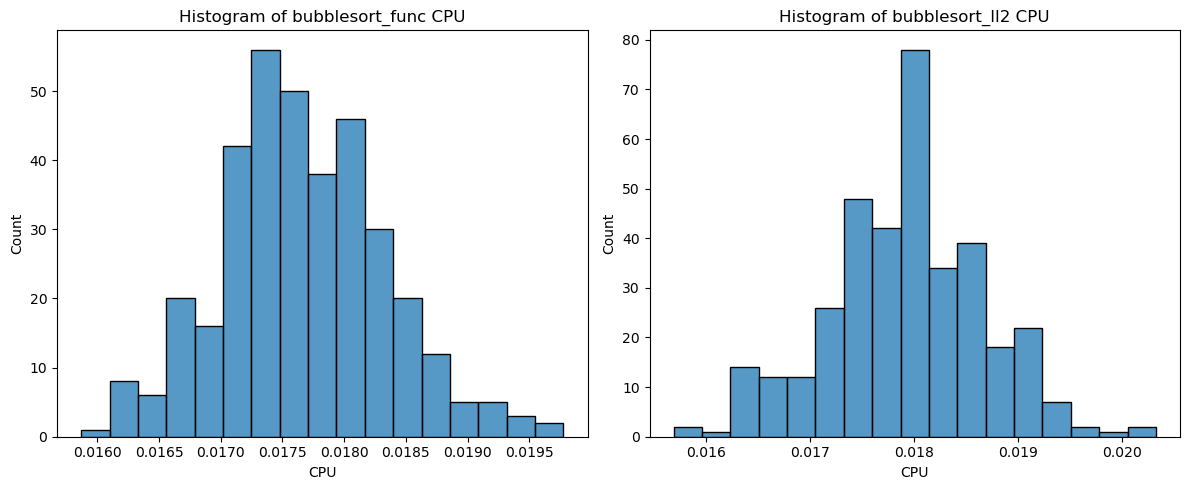

Mann-Whitney U test statistic: 50920.5
p-value: 6.502153741813431e-07

Student's t-test results:
t-statistic: -4.6923


In [5]:
# Extract the two groups
bubblesort_func_cpu = energy_data[energy_data['test'] == 'bubblesort_func']['CPU']
bubblesort_ll2_cpu = energy_data[energy_data['test'] == 'bubblesort_ll2']['CPU']

# Visual normality check
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograms
sns.histplot(data=bubblesort_func_cpu, ax=ax1)
ax1.set_title('Histogram of bubblesort_func CPU')
sns.histplot(data=bubblesort_ll2_cpu, ax=ax2)
ax2.set_title('Histogram of bubblesort_ll2 CPU')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test
stat, pvalue = stats.mannwhitneyu(bubblesort_func_cpu, bubblesort_ll2_cpu, alternative='two-sided')
t_stat, t_pvalue = stats.ttest_ind(bubblesort_func_cpu, bubblesort_ll2_cpu)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {pvalue}')
print("\nStudent's t-test results:")
print(f't-statistic: {t_stat:.4f}')


## 4. Time Performance Analysis
Analyzing execution time differences between implementations:
- Distribution visualization
- Statistical comparison
- Practical significance assessment

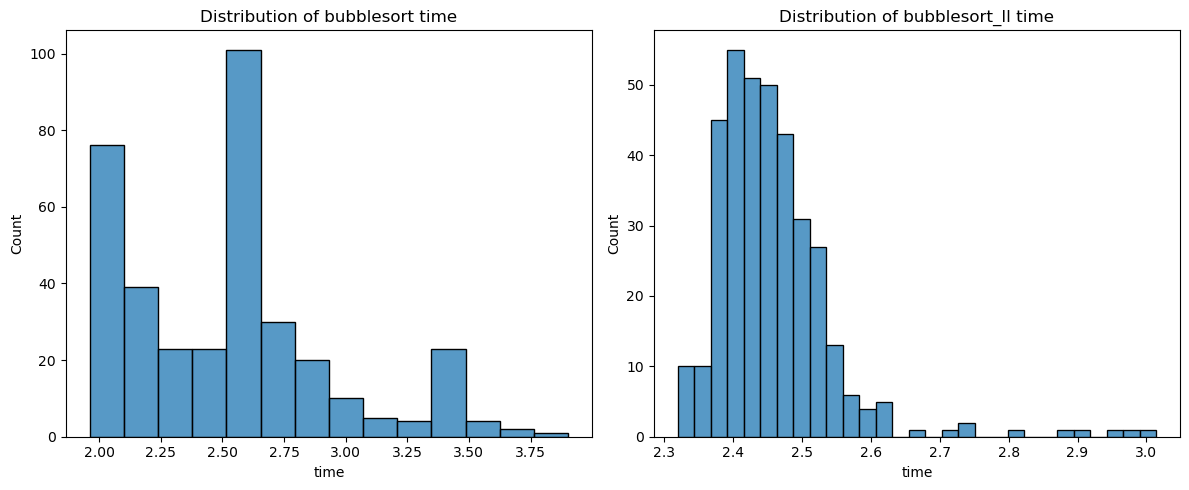


Mann-Whitney U test results:
Statistic: 74960.0000
p-value: 3.5855e-04

Median times:
bubblesort: 2.5410
bubblesort_ll: 2.4430
Difference: 0.0980


In [8]:
# 1. Extract the time data for both groups
bubblesort_time = energy_data[energy_data['test'] == 'bubblesort']['time']
bubblesort_ll_time = energy_data[energy_data['test'] == 'bubblesort_ll']['time']

# 2. Create visualization
plt.figure(figsize=(12, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.histplot(data=bubblesort_time)
plt.title('Distribution of bubblesort time')

# Second subplot
plt.subplot(1, 2, 2)
sns.histplot(data=bubblesort_ll_time)
plt.title('Distribution of bubblesort_ll time')

plt.tight_layout()
plt.show()

# 3. Statistical tests

# Mann-Whitney U test
stat, pvalue = stats.mannwhitneyu(bubblesort_time, bubblesort_ll_time, alternative='two-sided')
print("\nMann-Whitney U test results:")
print(f"Statistic: {stat:.4f}")
print(f"p-value: {pvalue:.4e}")

# Effect size
print(f"\nMedian times:")
print(f"bubblesort: {bubblesort_time.median():.4f}")
print(f"bubblesort_ll: {bubblesort_ll_time.median():.4f}")
print(f"Difference: {bubblesort_time.median() - bubblesort_ll_time.median():.4f}")

## 5. ANOVA Analysis - CPU Usage
One-way ANOVA to examine differences across all implementations:
- Testing for overall differences in CPU usage
- Extremely high F-statistic indicates:
  - Large differences between implementations
  - Consistent performance within each implementation

In [16]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    energy_data[energy_data['test'] == 'bubblesort']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_ll']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_func']['CPU'],
    energy_data[energy_data['test'] == 'bubblesort_ll2']['CPU']
)

print(f'One-way ANOVA F-statistic: {f_stat}')
print(f'p-value: {p_value}')



One-way ANOVA F-statistic: 5641.937696029289
p-value: 0.0


## 6. ANOVA Analysis - Execution Time
Similar ANOVA analysis for execution time:
- Comparing time performance across all implementations
- Understanding overall efficiency differences

In [17]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    energy_data[energy_data['test'] == 'bubblesort']['time'],
    energy_data[energy_data['test'] == 'bubblesort_ll']['time'],
    energy_data[energy_data['test'] == 'bubblesort_func']['time'],
    energy_data[energy_data['test'] == 'bubblesort_ll2']['time']
)

print(f'One-way ANOVA F-statistic: {f_stat}')
print(f'p-value: {p_value}')


One-way ANOVA F-statistic: 2556.3329354127823
p-value: 0.0
